<a href="https://colab.research.google.com/github/1MedvedevV/M_AI/blob/main/DatasetAccuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исходные данные:
                                        Name     Mileage  Rating Review Count  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  29,636 mi.     3.9       1,800    
1          2022 Mercedes-Benz AMG SL 63 Base   5,540 mi.     4.7       1,239    
2          2022 Mercedes-Benz AMG SL 63 Base   4,890 mi.     4.7       1,239    
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  29,746 mi.     4.8         752    
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC  32,631 mi.     5.0       1,502    

      Price  
0   $30,900  
1  $139,999  
2  $132,999  
3   $58,587  
4   $95,990  


<ipython-input-21-9c3f08096d18>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
<ipython-input-21-9c3f08096d18>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].replace({',': '', ' mi.': ''}, regex=True).astype(float)
<ipython-input-21-9c3f08096d18>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst


Преобразованные данные:
                                        Name  Year  Mileage  Rating  \
0    2021 Mercedes-Benz A-Class A 220 4MATIC  2021  29636.0     3.9   
1          2022 Mercedes-Benz AMG SL 63 Base  2022   5540.0     4.7   
2          2022 Mercedes-Benz AMG SL 63 Base  2022   4890.0     4.7   
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC  2020  29746.0     4.8   
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC  2021  32631.0     5.0   

   Review Count     Price  
0        1800.0   30900.0  
1        1239.0  139999.0  
2        1239.0  132999.0  
3         752.0   58587.0  
4        1502.0   95990.0  


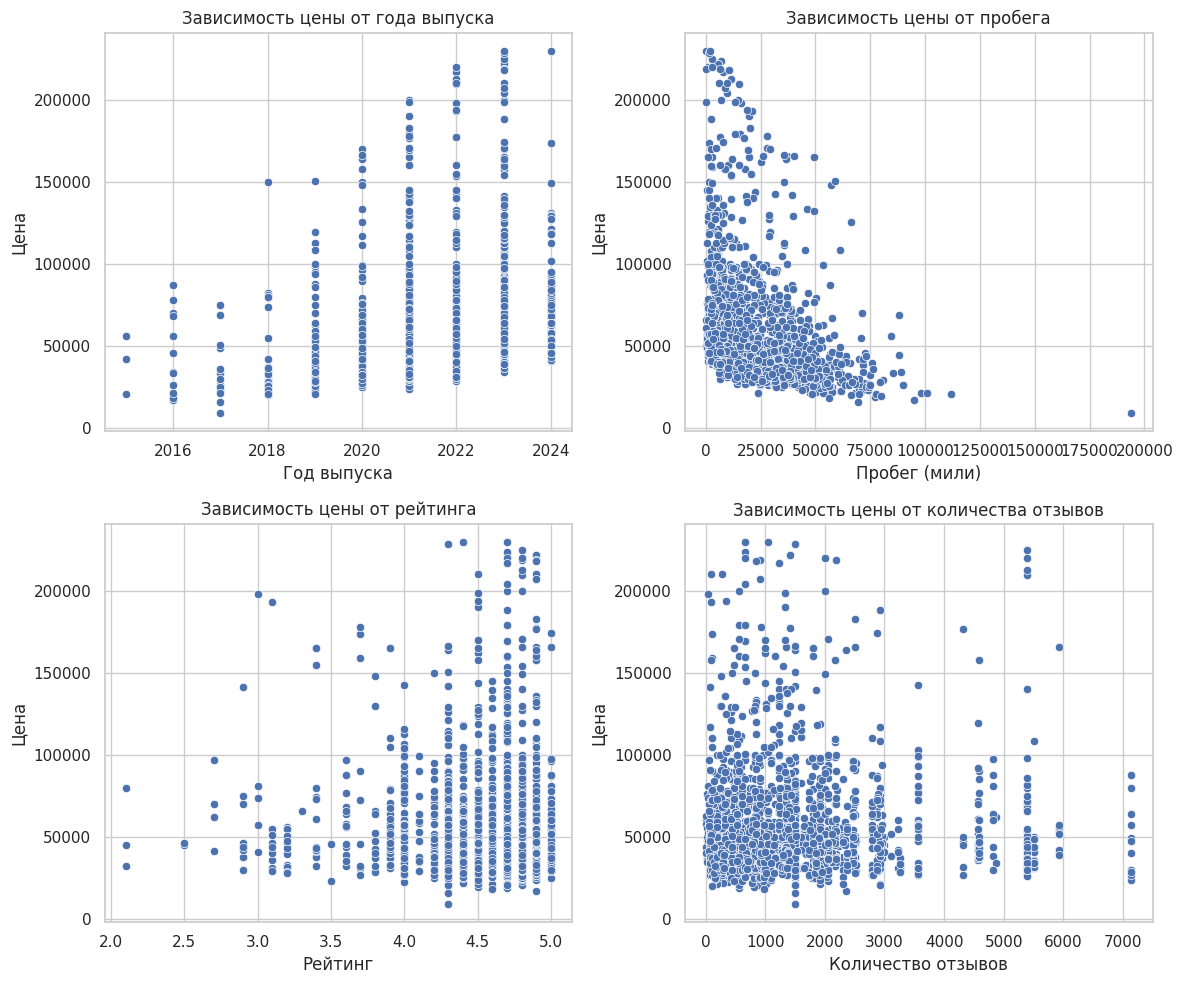

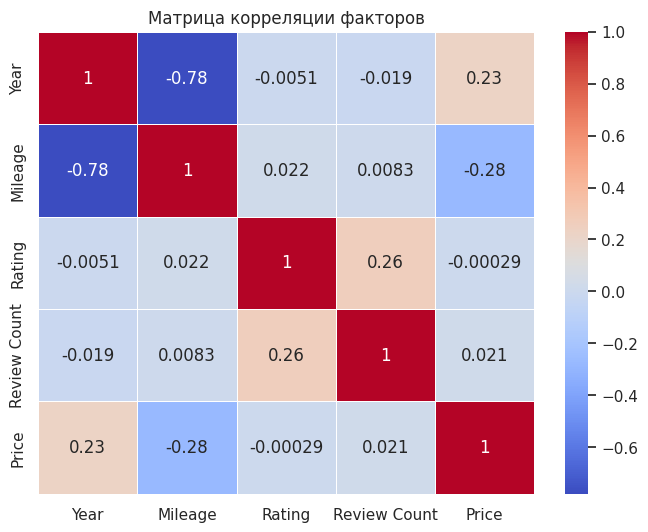

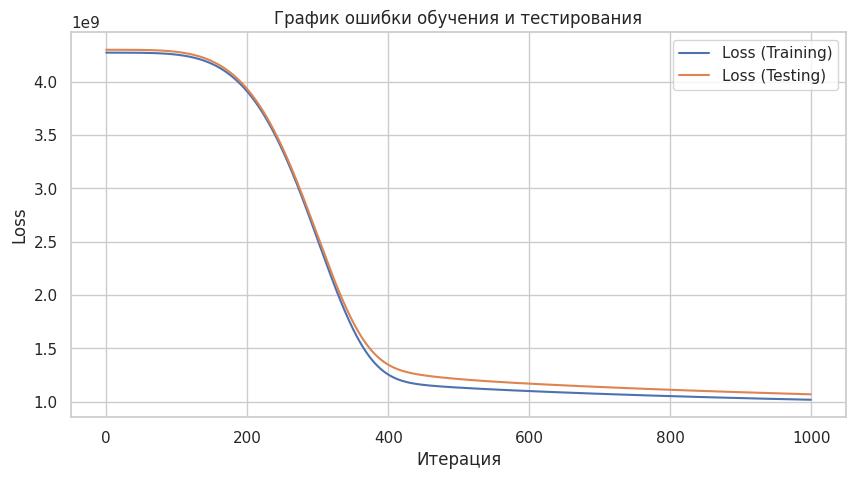

Test Loss: 1070588416.0000
Model Accuracy (R^2): -0.0186


In [21]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Загрузка датасета с GitHub
url = "https://raw.githubusercontent.com/1MedvedevV/M_AI/refs/heads/main/usa_mercedes_benz_prices.csv"
df = pd.read_csv(url)

# Выводим первые 5 строк исходного датасета
print("Исходные данные:")
print(df.head())

# Очистка данных и преобразование столбцов
df = df[df['Price'] != 'Not Priced']
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Mileage'] = df['Mileage'].replace({',': '', ' mi.': ''}, regex=True).astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Review Count'] = df['Review Count'].replace({',': ''}, regex=True).astype(float)
df['Year'] = df['Name'].str.extract(r'(\d{4})').astype(int)
df['Name'] = df['Name'].str.strip()

# Удаляем строки с NaN или бесконечными значениями
df.dropna(inplace=True)
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

# Вывод преобразованных данных
print("\nПреобразованные данные:")
print(df[['Name', 'Year', 'Mileage', 'Rating', 'Review Count', 'Price']].head())

# Визуализация зависимостей
sns.set(style="whitegrid")

# Создание фигуры с матрицей 2x2 для размещения графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# График 1: Зависимость цены от года выпуска
sns.scatterplot(x='Year', y='Price', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Зависимость цены от года выпуска')
axs[0, 0].set_xlabel('Год выпуска')
axs[0, 0].set_ylabel('Цена')

# График 2: Зависимость цены от пробега
sns.scatterplot(x='Mileage', y='Price', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Зависимость цены от пробега')
axs[0, 1].set_xlabel('Пробег (мили)')
axs[0, 1].set_ylabel('Цена')

# График 3: Зависимость цены от рейтинга
sns.scatterplot(x='Rating', y='Price', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Зависимость цены от рейтинга')
axs[1, 0].set_xlabel('Рейтинг')
axs[1, 0].set_ylabel('Цена')

# График 4: Зависимость цены от количества отзывов
sns.scatterplot(x='Review Count', y='Price', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Зависимость цены от количества отзывов')
axs[1, 1].set_xlabel('Количество отзывов')
axs[1, 1].set_ylabel('Цена')

# Увеличиваем расстояние между графиками для лучшего отображения
plt.tight_layout()
plt.show()

# Визуализация матрицы корреляции
corr_matrix = df[['Year', 'Mileage', 'Rating', 'Review Count', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции факторов')
plt.show()

# Отделяем зависимые и независимые переменные
X = df[['Year', 'Mileage', 'Rating', 'Review Count']].values
y = df['Price'].values

# Нормализация входных данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование в тензоры
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Определение класса многослойного перцептрона
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 128)  # Входной слой с 4 входами, скрытый слой с 128 нейронами
        self.fc2 = nn.Linear(128, 64)  # Скрытый слой с 64 нейронами
        self.fc3 = nn.Linear(64, 32)   # Скрытый слой с 32 нейронами
        self.fc4 = nn.Linear(32, 1)    # Выходной слой с 1 выходом

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # Применение функции активации ReLU
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)                # Выход
        return x

# Создаем экземпляр модели
model = MLP()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()  # Среднеквадратичная ошибка
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 1000
losses_train = []
losses_test = []

for epoch in range(num_epochs):
    model.train()  # Переводим модель в режим обучения

    # Прямое распространение
    outputs_train = model(X_train_tensor).squeeze()
    loss_train = criterion(outputs_train, y_train_tensor)

    # Обратное распространение и оптимизация
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # Сохраняем значение потерь
    losses_train.append(loss_train.item())

    # Оценка модели на тестовой выборке
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        outputs_test = model(X_test_tensor).squeeze()
        loss_test = criterion(outputs_test, y_test_tensor)
        losses_test.append(loss_test.item())

# Построение графика ошибки обучения и тестирования
plt.figure(figsize=(10, 5))
plt.plot(losses_train, label='Loss (Training)')
plt.plot(losses_test, label='Loss (Testing)')
plt.title('График ошибки обучения и тестирования')
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Оценка модели на тестовой выборке
model.eval()  # Переводим модель в режим оценки
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_loss = criterion(test_outputs, y_test_tensor)
    r2 = r2_score(y_test_tensor.numpy(), test_outputs.numpy())
    print(f'Test Loss: {test_loss.item():.4f}')
    print(f'Model Accuracy (R^2): {r2:.4f}')
